<a href="https://colab.research.google.com/github/Rohit0994/Rossmann-Retail-Sales-Prediction---Regression/blob/main/Rohit_Retail_Sales_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**  - Retail Sales Prediction

##### **Project Type**    - **Regression**
##### **Contribution**    - **Team**
##### **Team Member 1 -** - **Rohit Sharma**
##### **Team Member 2 -** - **Piyush Sirotha**

# **GitHub Link -**
#####https://github.com/Rohit0994/Rossmann-Retail-Sales-Prediction---Regression

# **Problem Description**

####Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores
###train.csv - historical data including Sales
###test.csv - historical data excluding Sales


### <b><u>Data fields</u></b>

* #### Id - Unique entry ID
* #### Store - an unique Id for each store
* #### Sales - Total sales for any given day (what we are going to predict)
* #### Customers - the number of customers footfall on that day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

##1.Business Problem
Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. 
 This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same. 

 Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.

####Approach
* Business Problem
* Data Collection and Preprocessing
      - Importing important libraries and modules
      - Understanding the data
      - Treating the Null/Missing Values
      - Merging the Datasets
* Exploratory Data Analysis
      - Hypotheses
      - Categorical Features
      - Continuous Features
      - EDA Conclusion and Validating Hypotheses
* Feature Selection and Outlier Detection
      - Feature Engineering
      - Outlier Detection and Treatment
* Modeling
      - Train Test Split
      - Baseline Model - Decision Tree
      - Random Forest Model
      - Random Forest Hyperparameter Tuning
      - Random Forest Feature Importance
* Model Performance and Evaluation
        - Visualizing Model Performances
        - Random Forest vs Baseline Model
        - Random Forest Tuned vs Baseline and Random Forest Models
* Store wise Sales Predictions
* Conclusion and Recommendations

## 2.Data Collection and Preprocessing

####(i). Importing the libraries

In [195]:
#Importing important libraries and modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

In [196]:
#Loading the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
#Reading CSV FILE
sales_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project csv files/SElf project retal sales /Rossmann Stores Data.csv")
stores_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project csv files/SElf project retal sales /store.csv")


####(ii).Understanding the data

In [198]:
#Sales Dataset First Look
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [199]:
#Store Dataset First Look
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [200]:
#Shape of the both dataset
sales_df.shape,stores_df.shape


((1017209, 9), (1115, 10))

In [201]:
#info about the Sales dataset
sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There are  1017209 rows or observations and 9 columns in this dataset. There is no null values in it. 

In [202]:
#info about the Stores dataset
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are 1115 rows and 10 columns. There are some NULL values in it and it is important to impute them with appropriate values in order to get good results later on.

####(iii)Treating the Null/Missing Values

In [203]:
# Null values in stores_df
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

I found NAN values in store data.
There were a lot of nan values in some columns that we have to be deal with.So i writing a code to specifically deal with the null values of each column either by replacing it with 0,mode or median.
Removing the columns was not an option as they might remove Important data.

Out of 1115 entries there are NULL values for the columns:
* CompetitionDistance- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

* CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* CompetitionOpenSinceYear-  gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.      


In [204]:
# Copy the data set that our original data set remain unchanged
stores2_df=stores_df.copy()

In [205]:
# filling competition distance with the zero(0)
stores_df['CompetitionDistance'] = stores_df['CompetitionDistance'].fillna(0)

# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
competition_month_mode = stores_df['CompetitionOpenSinceMonth'].mode().iloc[0]
stores_df['CompetitionOpenSinceMonth']=stores_df['CompetitionOpenSinceMonth'].fillna(competition_month_mode)
competition_year_mode = stores_df['CompetitionOpenSinceYear'].mode().iloc[0]
stores_df['CompetitionOpenSinceYear'] = stores_df['CompetitionOpenSinceYear'].fillna(competition_year_mode)

# imputing the nan values of promo2 related columns with 0
stores_df['Promo2SinceWeek']=stores_df['Promo2SinceWeek'].fillna(0)
stores_df['Promo2SinceYear']=stores_df['Promo2SinceYear'].fillna(0)
stores_df['PromoInterval']=stores_df['PromoInterval'].fillna(0)

In [206]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


####(iv)Merging the two Datasets

In [207]:
# Merging the dataset (sales data is more compare to store data)
data_df = pd.merge(sales_df,stores_df, how='left', on='Store')


In [208]:
data_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [209]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [210]:
data_df['Customers'].value_counts()                 

0       172869
560       2414
576       2363
603       2337
571       2330
         ...  
4815         1
3998         1
4210         1
4920         1
4065         1
Name: Customers, Length: 4086, dtype: int64

In [211]:
# Creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [212]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {data_df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [213]:
# Creating New Features from Date
data_df['Year'] = data_df['Date'].apply(lambda x: int(str(x)[0:4]))
data_df['Month'] = data_df['Date'].apply(lambda x: int(str(x)[5:7]))
data_df.drop(['Date'],axis=1,inplace=True)

##2.Exploratory Data Analysis

Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it. It includes analyzing what our dataset consists of. Exploring continuous as well as categorical variables and their influence on our dependent variable-'Sales'.

####(i)**Some Hypothesis we can make**
* There's a feature called "DayOfWeek" with the values 1-7 denoting each day of the week. There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.
* Sales is highly correlated to number of Customers.
* Some premium high quality products would fetch more revenue.
* Promotion should be having a positive correlation with Sales.
* Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.


####(ii)Sales is dependent on some Categorical Features:

#####We are going to see the sales variation for the all categorical Features, that how it is affecting the sales.

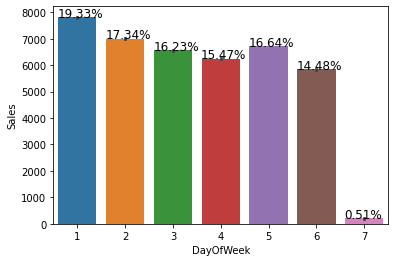

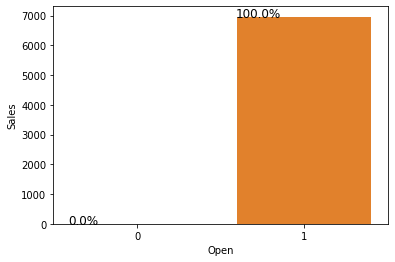

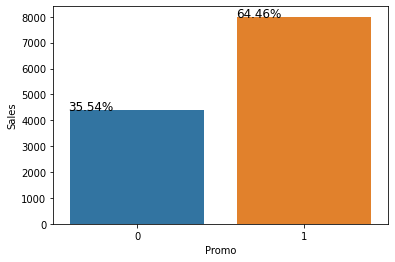

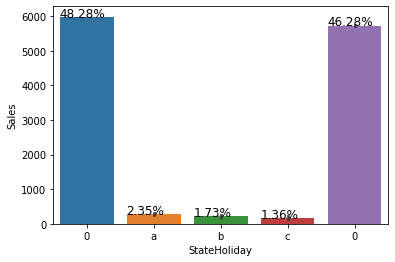

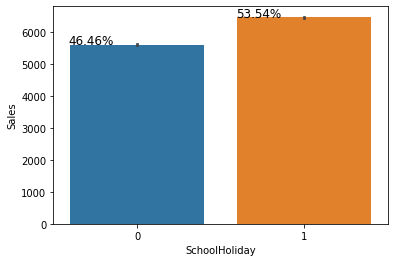

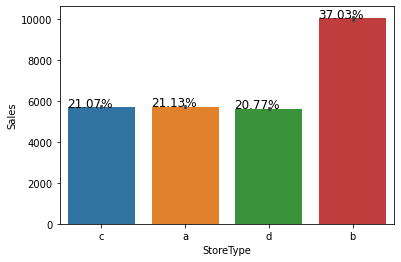

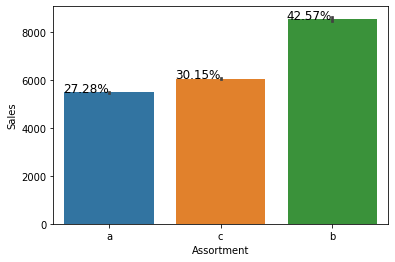

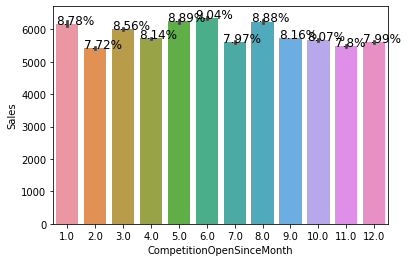

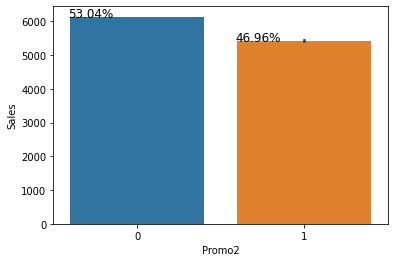

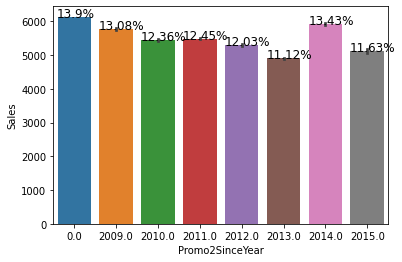

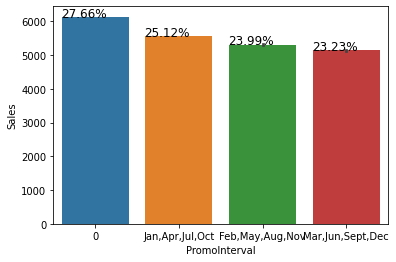

In [214]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=data_df[value], y=data_df['Sales']) 
  totals = []                           ##The total height of all the bars is calculated by summing up all the heights of the bars in the "list totals"    
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()          #displays the plot for each categorical variable.  #  #calculate the percentage is (height of bar / total height of all bars) * 100



####Observation:
*  We can see that there are Maximum sales on Monday,This might be due to the fact that stores are closed on Sundays.
* We can see that Promo help to gain more sales.
* Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
* Stores which were opened during School holidays had more sales than normal.
* Store type b has done more sales compare to store type a,c,d.
* Highest average sales were seen with Assortment(variety) levels-b which is 'extra'.
* With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.


<Axes: xlabel='Open', ylabel='count'>

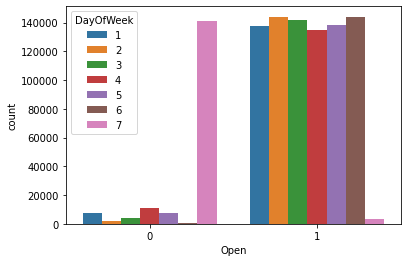

In [215]:
#Lets see open, how many shops are open on which days 
#and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
sns.countplot(x=data_df["Open"], hue=data_df["DayOfWeek"])

#####This clearly shows that most of the stores remain closed during Sundays. Some stores were closed in weekdays too, this might be due to State Holidays as stores are generally closed during State Holidays and opened during School Holidays.

<Axes: xlabel='StoreType', ylabel='Sales'>

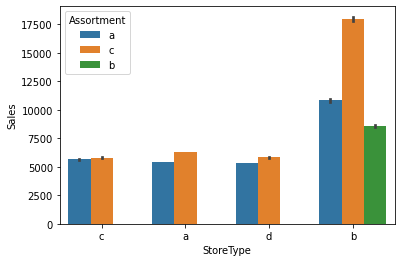

In [216]:
# Finding the relationship between store type, assortment levels and sales
sns.barplot(x=data_df['StoreType'], y= data_df['Sales'], hue=data_df['Assortment'])

####Observation:
It shows that the store types a, c and d have only two assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

In [217]:
# Store Type with Sales and Customers
store_type = data_df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"],ascending=False,inplace=True) 
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


### Lets check which store type and assortment has the highest Sales, Average sales and customer.

In [218]:
# define a function to get count of each unique value from a particular column 
# returns a dataframe
def get_count_from_column(dataframe, column_label):
  df_grpd = data_df[column_label].value_counts()
  df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})
  return df_grpd

# define a function to get sum of a certain feature for each unique value from a particular column 
# returns a dataframe
def get_sum_from_column(dataframe, column_label, feature):
  df_grpd = dataframe.groupby(column_label)[feature].sum().reset_index(name=feature)
  return df_grpd

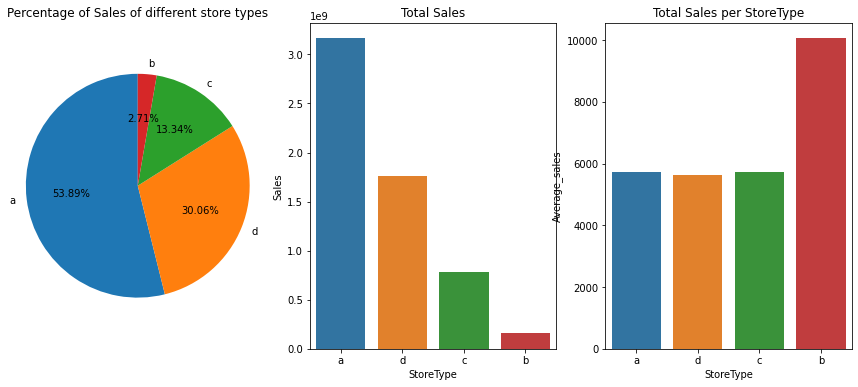

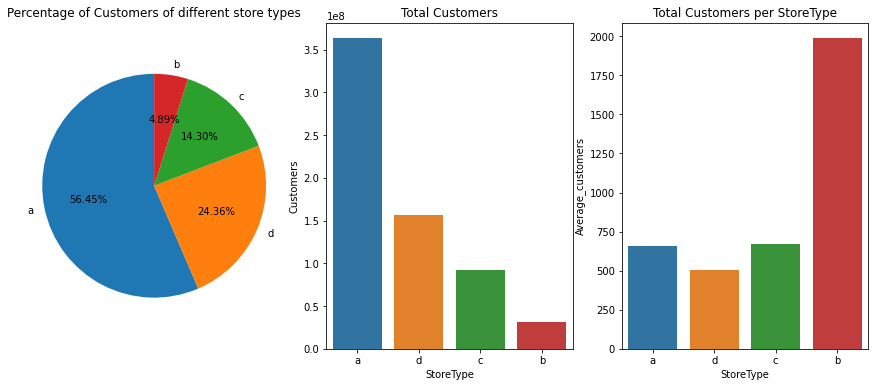

In [219]:
store_type_count_df = get_count_from_column(data_df.copy().loc[0:1115, ['Store', 'StoreType']], 'StoreType').rename(columns={'index':'StoreType'})

store_type_sales_sum_df = get_sum_from_column(data_df, 'StoreType', 'Sales')
store_type_df = store_type_count_df.merge(right=store_type_sales_sum_df, on='StoreType')
store_type_df['Percent_sales'] = round(store_type_df['Sales']/store_type_df['Sales'].sum()*100, 2)
store_type_df['Average_sales'] = round(store_type_df['Sales']/store_type_df['count'], 2)

store_type_customer_sum_df = get_sum_from_column(data_df, 'StoreType', 'Customers')
store_type_df = store_type_df.merge(right=store_type_customer_sum_df, on='StoreType')
store_type_df['Percent_customers'] = round(store_type_df['Customers']/store_type_df['Customers'].sum()*100, 2)
store_type_df['Average_customers'] = round(store_type_df['Customers']/store_type_df['count'], 2)

for feature in ('Sales', 'Customers'):
  fig, axes = plt.subplots(1, 3, figsize=(15, 6))
  axes[0].pie(store_type_df.loc[:, feature], labels=store_type_df.loc[:, 'StoreType'], autopct='%1.2f%%', startangle=90)
  axes[0].axis('equal')
  axes[0].set_title(f"Percentage of {feature} of different store types")
  sns.barplot(ax=axes[1], x=store_type_df['StoreType'], y=store_type_df[feature])
  axes[1].set_title(f"Total {feature}")

  sns.barplot(ax=axes[2], x=store_type_df['StoreType'], y=store_type_df['Average_' + feature.lower()])
  axes[2].set_title(f"Total {feature} per StoreType")

  plt.show()

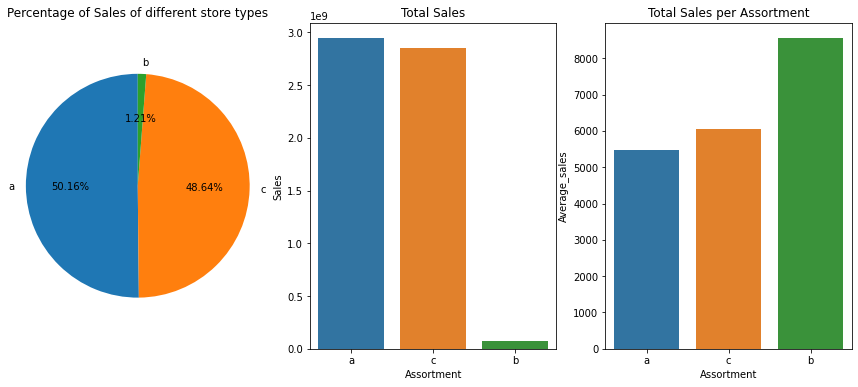

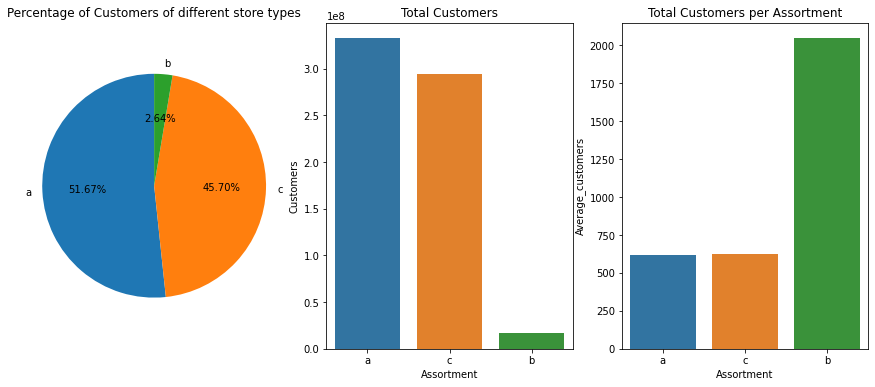

In [220]:
# get a dataframe with count, sales, average sales, percentage sales, customers, average customers and percentage of customers of different assortments
assortment_count_df = get_count_from_column(data_df.copy().loc[0:1115, ['Store', 'Assortment']], 'Assortment').rename(columns={'index':'Assortment'})

assortment_sales_sum_df = get_sum_from_column(data_df, 'Assortment', 'Sales')
assortment_df = assortment_count_df.merge(right=assortment_sales_sum_df, on='Assortment')
assortment_df['Percent_sales'] = round(assortment_df['Sales']/assortment_df['Sales'].sum()*100, 2)
assortment_df['Average_sales'] = round(assortment_df['Sales']/assortment_df['count'], 2)

assortment_customer_sum_df = get_sum_from_column(data_df, 'Assortment', 'Customers')
assortment_df = assortment_df.merge(right=assortment_customer_sum_df, on='Assortment')
assortment_df['Percent_customers'] = round(assortment_df['Customers']/assortment_df['Customers'].sum()*100, 2)
assortment_df['Average_customers'] = round(assortment_df['Customers']/assortment_df['count'], 2)

for feature in ('Sales', 'Customers'):
  fig, axes = plt.subplots(1, 3, figsize=(15, 6))
  axes[0].pie(assortment_df.loc[:, feature], labels=assortment_df.loc[:, 'Assortment'], autopct='%1.2f%%', startangle=90)
  axes[0].axis('equal')
  axes[0].set_title(f"Percentage of {feature} of different store types")

  sns.barplot(ax=axes[1], x=assortment_df['Assortment'], y=assortment_df[feature])
  axes[1].set_title(f"Total {feature}")

  sns.barplot(ax=axes[2], x=assortment_df['Assortment'], y=assortment_df['Average_' + feature.lower()])
  axes[2].set_title(f"Total {feature} per Assortment")

  plt.show()

##Observation
* It can be clearly observed that the highest sales and customers belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
* Interesting insight to note is that store type b with highest average sales and customers, per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

####(iii) Continuous Features

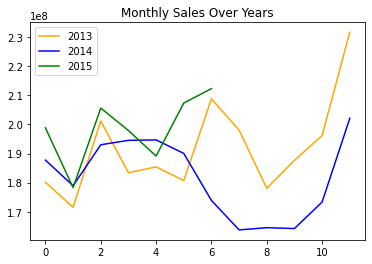

In [221]:
# Calculating sales for all the 3 years
sales_df_2013 = data_df[data_df['Year']== 2013]
sales_df_2014 = data_df[data_df['Year']==2014]
sales_df_2015 = data_df[data_df['Year']== 2015]

#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.rcParams['figure.figsize'] = [15,6] 
plt.legend(loc="upper left",fontsize=10)

####Observation:
Sales is increasing by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

<Axes: xlabel='Customers', ylabel='Sales'>

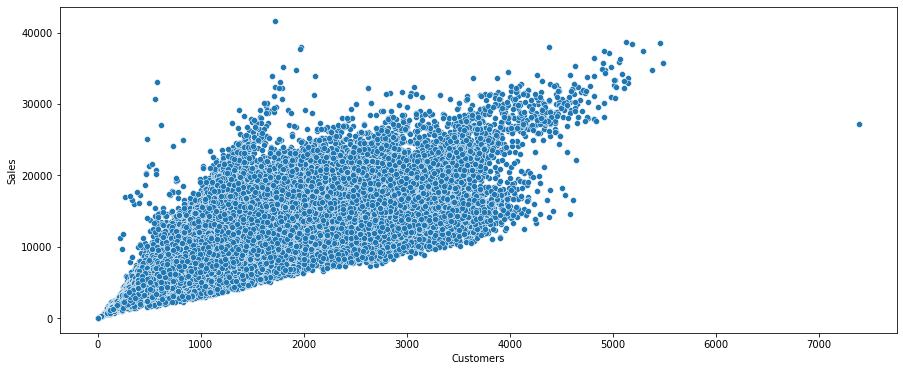

In [222]:
# Showing The positive correlataion relation between Sales and Customers
sns.scatterplot(x=data_df['Customers'],y=data_df['Sales'])

#there are few outliers.

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

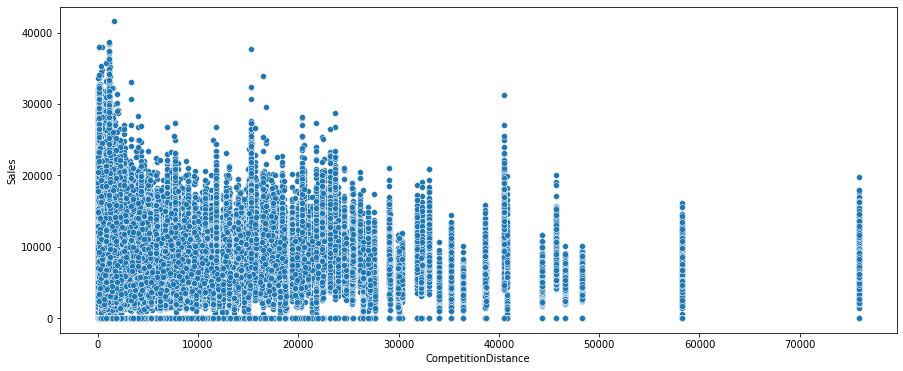

In [223]:
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=data_df['CompetitionDistance'], y=data_df['Sales'])

####If two Stores compete directly next to each other, they will evenly split the Sales means higher sales, So stores who are next to each other has more sales.

###Correlation Matrix
Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.

By checking the correlation the factors affecting sales can be figured out.

In [224]:
# # generate a correlation matrix using all features in the dataframe
# corr_mat = data_df.corr().abs()

# # plot heatmap using correlation matrix
# fig, axes = plt.subplots(figsize=(12, 12))
# sns.heatmap(corr_mat, annot = True, fmt='.2f', annot_kws={'size': 10},  vmax=1.0, square=True, cmap='Blues');

####Observation:
* Customers and sales are also highly correlated because an increase in customers means that there must be an increase in sales too.
* We can see that week of year and month are highly correlated, which is obvious since they represent points in the same timeframe but with different range.
* Open is moderately correlated with sales and customers because customers, who drive sales, can access shops only when the shops are open.
* There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.



####(iv)EDA Conclusion and Validating Hypotheses
* The most selling and crowded store type is A.
* Sales is highly correlated to number of Customers.
* For all stores, Promotion leads to increase in Sales and Customers both.
The stores which are opened during School Holiday have more sales than normal days.
* More stores are opened during School holidays than State holidays.
* Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.
* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.

##4.Feature Selection and Outlier Detection

####It involves manipulating and changing our dataset before feeding it to various machine learning models. This involves keeping important features, outlier treatment, feature scaling and creating dummy variables if necessary.

##### Using VIF to remove or treat Multicollinearity

In [225]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [226]:
# define a function to calculate the vif of all features
# returns a dataframe
def calculate_vif_of_all_features(dataframe):
  temp_df = pd.DataFrame()
  temp_df['Feature'] = dataframe.columns
  temp_df['VIF'] = [variance_inflation_factor(dataframe.values, column_index) for column_index in range(dataframe.shape[1])]

  return temp_df

In [227]:
# calculate VIF of all independant numerical features
numerical_independant_features = ['Customers', 'CompetitionDistance', 'CompetitionOpenNumMonths', 'Promo2NumWeeks']
calculate_vif_of_all_features(data_df[[column for column in data_df.describe().columns if column in numerical_independant_features]])

,Feature,VIF
0,Customers,1.206981
1,CompetitionDistance,1.206981


#####All features have VIF less than 5.

## Handling Outliers

####Outliers and Z score:

In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

z = (x-mean)/standard deviation

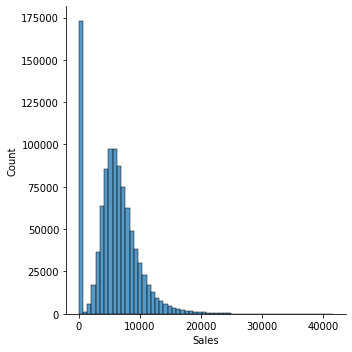

In [228]:
sns.displot(data_df,x='Sales',bins=60)

###Observation:
#####As we can see in the distribution plot Sales greater than 25k are very less,therefore they might be the outliers.

###Z-Score: If the Z-Score of any datapoint is greater than 3(threshold) then that can be considered as an Outlier

Total No.of outliers in dataset:  9731


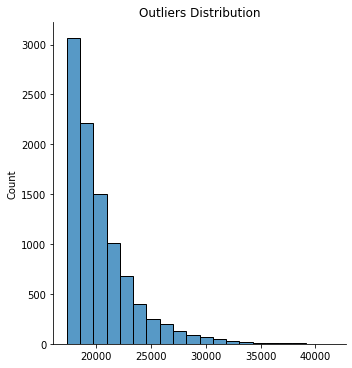

In [229]:
mean_sales = np.mean(data_df['Sales'])
std_sales = np.std(data_df['Sales'])

threshold = 3

outliers = []
for i in data_df['Sales']:
    z_score = (i-mean_sales)/std_sales
    if z_score > threshold:
        outliers.append(i)
        
print('Total No.of outliers in dataset: ', len(outliers))

sns.displot(x=outliers,bins=20).set(title='Outliers Distribution')

In [230]:
# Percentage of Outliers 
zero_sales = data_df.loc[data_df['Sales']==0]

sales_greater_than_25k = data_df.loc[data_df['Sales'] > 25000]



In [231]:
data_df.drop(data_df.loc[data_df['Sales'] > 25000].index,inplace=True)

In [232]:
data_df.shape

(1016451, 19)

##Converting Categorical Variable to Numeric

In [233]:
# PromoInterval column has values 0 & "0", So, we need to change values with 0 to "0"

data_df['PromoInterval'].loc[data_df['PromoInterval'] == 0] = '0'
data_df['StateHoliday'].loc[data_df['StateHoliday'] == 0] = '0'


In [234]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016451 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1016451 non-null  int64  
 1   DayOfWeek                  1016451 non-null  int64  
 2   Sales                      1016451 non-null  int64  
 3   Customers                  1016451 non-null  int64  
 4   Open                       1016451 non-null  int64  
 5   Promo                      1016451 non-null  int64  
 6   StateHoliday               1016451 non-null  object 
 7   SchoolHoliday              1016451 non-null  int64  
 8   StoreType                  1016451 non-null  object 
 9   Assortment                 1016451 non-null  object 
 10  CompetitionDistance        1016451 non-null  float64
 11  CompetitionOpenSinceMonth  1016451 non-null  float64
 12  CompetitionOpenSinceYear   1016451 non-null  float64
 13  Promo2      

In [235]:
data_df.shape

(1016451, 19)

In [236]:
new_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [237]:
for col in new_variables:
  print(f'Unique values for {col}: {data_df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c']
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: ['0' 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [238]:
# encoding all categorical varibale to numeric values

data_df['StoreType'] = label_encoder.fit_transform(data_df['StoreType'])
data_df['Assortment'] = label_encoder.fit_transform(data_df['Assortment'])
data_df['StateHoliday'] = label_encoder.fit_transform(data_df['StateHoliday'])
data_df['PromoInterval'] = label_encoder.fit_transform(data_df['PromoInterval'])


In [239]:
data_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,2,5,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,2,2015,7
2,3,5,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,2,2015,7
3,4,5,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7
4,5,5,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7


In [240]:
data_df_open = data_df[data_df['Open']==1]
data_df_closed = data_df[data_df['Open']==0]

<Axes: ylabel='Density'>

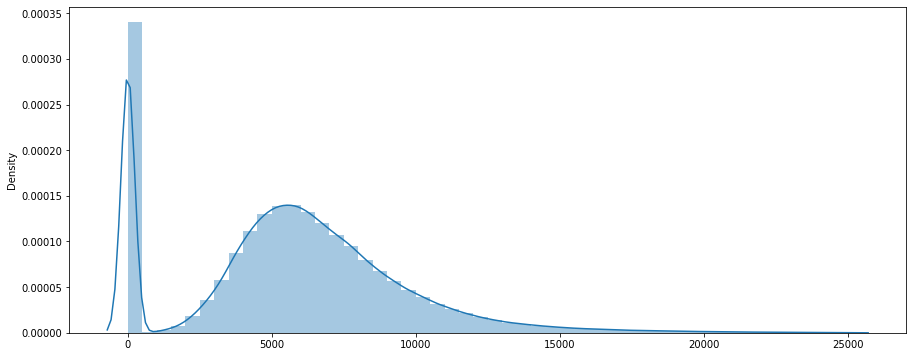

In [241]:
sns.distplot(x=data_df['Sales'])

#### Here we can see the distribution is rightly skewed, for Developing models we have to transform it to normalize by using log function.

<Axes: ylabel='Density'>

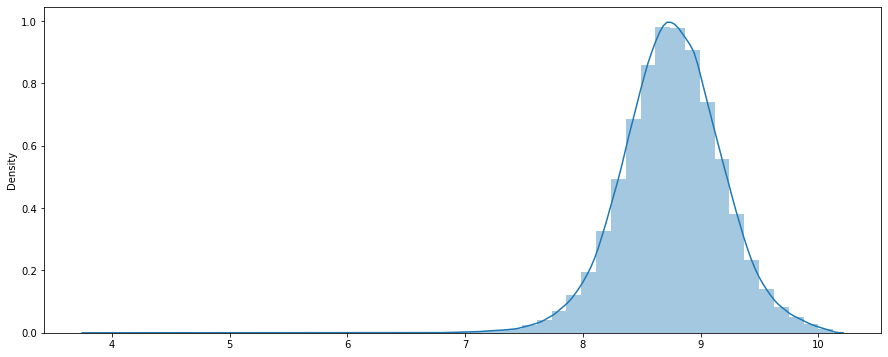

In [242]:
#We have seen that Sales graph is positively skewed , so we have to transform it to normalize it using log function.
data_df['Sales'] = np.log(data_df['Sales'])
data_df.drop(data_df[data_df['Sales'] == float("-inf")].index,inplace=True)

sns.distplot(x=data_df['Sales'])

#Sort of it looks like a Normal distribution graph



<Axes: ylabel='Density'>

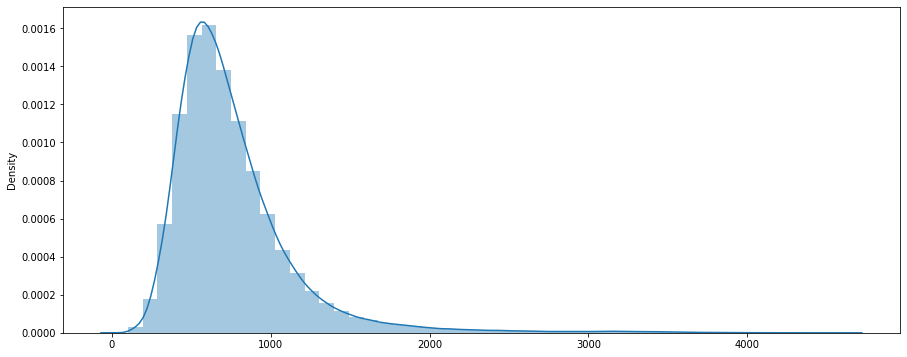

In [243]:
sns.distplot(x=data_df['Customers'])


<Axes: ylabel='Density'>

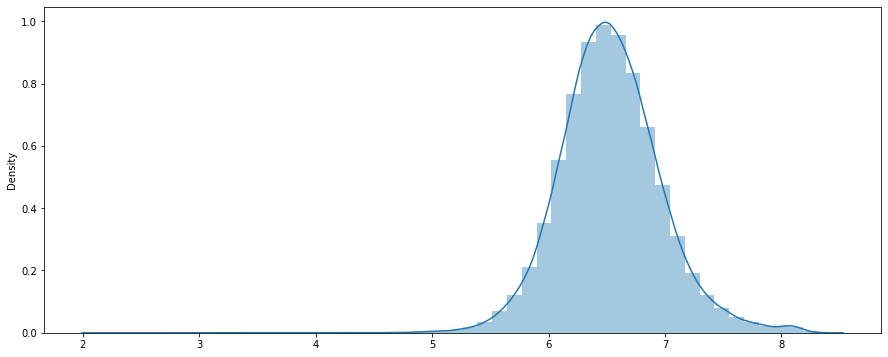

In [244]:
#We have seen that Customers graph is positively skewed , so we have to transform it to normalize it using log function.
data_df['Customers'] = np.log(data_df['Customers'])
data_df.drop(data_df[data_df['Customers'] == float("-inf")].index,inplace=True)

sns.distplot(x=data_df['Customers'])


#### Nearly we have transformed the distribution into Normal/Gaussian distribution for Customers and Sales data to make best model.

In [245]:
# Assigning two new variables which we are going to use in machine learning models where Store was open and closed.
data_df_open = data_df[data_df['Open']==1]
data_df_closed = data_df[data_df['Open']==0]

data_df['StateHoliday'].loc[data_df['StateHoliday'] == 0] = '0'
data_df['PromoInterval'].loc[data_df['PromoInterval'] == 0] = '0'

###Buliding a Regression Model
#####Here we want our ML model to predict sales only when they are open and we know that there will be no sales if the store is closed

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
X_train, X_test, y_train, y_test_open = train_test_split(data_df_open.drop(['Sales','Customers','Open'],axis=1),
                                                        data_df_open['Sales'], test_size=0.2, random_state=23)


In [247]:
X_train.columns

Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month'],
      dtype='object')

In [248]:
y_train.head()


1005075    8.692994
245299     8.994048
196513     8.272571
846341     9.367686
757122     8.350902
Name: Sales, dtype: float64

In [249]:
y_test_closed = np.zeros(data_df_closed.shape[0])
y_test = np.append(y_test_open, y_test_closed)

##Using Diffrent Models for prediction and Different Evaluation metrics to find accuracy and efeectiveness

##1.Linear Regression Algorithm


In [250]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [251]:
prediction_open = model.predict(X_test)
prediction_closed = np.zeros(data_df_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

In [252]:
# Performance of the model and check the accuracy

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

r2_score: 0.21731477496522722
Mean absolute error: 0.29
Root mean squared error:  0.3747421605168644


Text(0, 0.5, 'Predicted values')

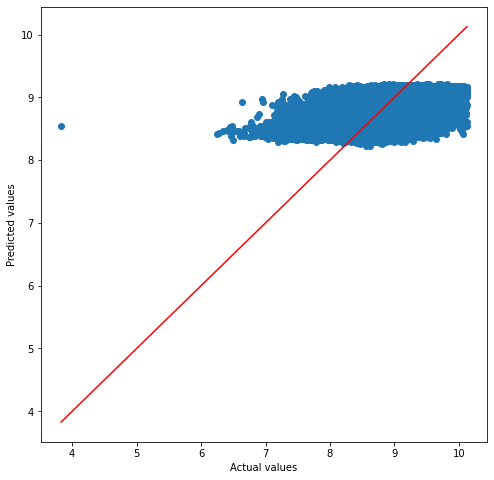

In [253]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

 Observation:
 
From the above plot we can see that Linear regression model is performing badly as its not making any predictions, also the accuracy is very low.

## 2.SGD Regression Algorithm

r2_score: -1.348490346727347e+32
Mean absolute error: 2686786786896629.00
Root mean squared error:  4918842416877909.0


Text(0, 0.5, 'Predicted values')

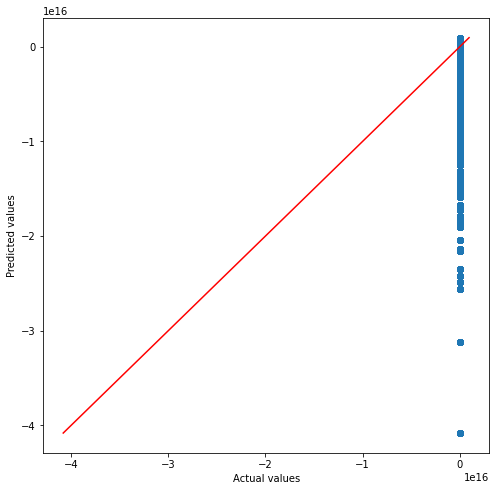

In [254]:
model = SGDRegressor()
model.fit(X_train,y_train)

prediction_open = model.predict(X_test)
prediction_closed = np.zeros(data_df_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')


Observation:

The SGD(Stochastic Gradient Descent) regressor is performing worse than Linear Regression as its giving negative r2 score, and more error lets see other regression models

## 3. Decision Tree Regressor

r2_score: 0.8375005462230103
Mean absolute error: 0.12
Root mean squared error:  0.17075166267222172


Text(0, 0.5, 'Predicted values')

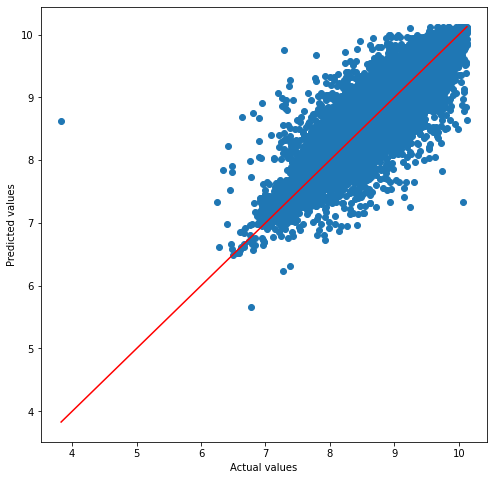

In [255]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

prediction_open = model.predict(X_test)
prediction_closed = np.zeros(data_df_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Observation:

The decision tree regressor performing well compared to Linear and SGD regressors, its r2-score is pretty good and error is minimal. so we can see that this model is doing good.

##4. Random Forest Regressor

r2_score: 0.8828434592153306
Mean absolute error: 0.10
Root mean squared error:  0.14498472813282204


Text(0, 0.5, 'Predicted values')

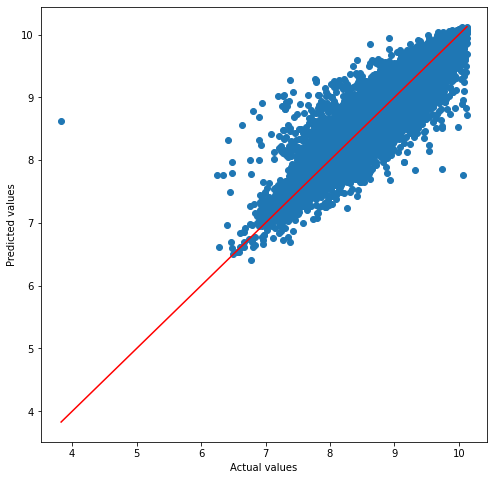

In [256]:
random_forest_model = RandomForestRegressor(n_estimators=100)
random_forest_model.fit(X_train,y_train)

prediction_open = random_forest_model.predict(X_test)
prediction_closed = np.zeros(data_df_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Observation:

Random Forest regressor had the lowest error as compared to other models, which means it is better at predicting sales than other models.
so we can go with the Random forest model which is doing fantastic.

## Model Explainability

In [257]:
# getting weights of all the features used in the data
feature_importance = random_forest_model.feature_importances_
feature_importance

array([0.15669191, 0.08548507, 0.16911239, 0.00152755, 0.01122088,
       0.03274284, 0.02420917, 0.20751878, 0.06635579, 0.07321451,
       0.00314142, 0.0309162 , 0.03706198, 0.01694577, 0.02424739,
       0.05960835])

In [258]:
# features used
columns = list(X_train.columns)
columns

['Store',
 'DayOfWeek',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'Year',
 'Month']

In [259]:
# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df

,Features,Values
0,Store,0.156692
1,DayOfWeek,0.085485
2,Promo,0.169112
3,StateHoliday,0.001528
4,SchoolHoliday,0.011221
5,StoreType,0.032743
6,Assortment,0.024209
7,CompetitionDistance,0.207519
8,CompetitionOpenSinceMonth,0.066356
9,CompetitionOpenSinceYear,0.073215


In [260]:
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
7,CompetitionDistance,0.207519
2,Promo,0.169112
0,Store,0.156692
1,DayOfWeek,0.085485
9,CompetitionOpenSinceYear,0.073215
8,CompetitionOpenSinceMonth,0.066356
15,Month,0.059608
12,Promo2SinceYear,0.037062
5,StoreType,0.032743
11,Promo2SinceWeek,0.030916


###Observation

##### We can see from the Model Explainability that 2 features Competition Distance, promo is contributing most to increase sale number.

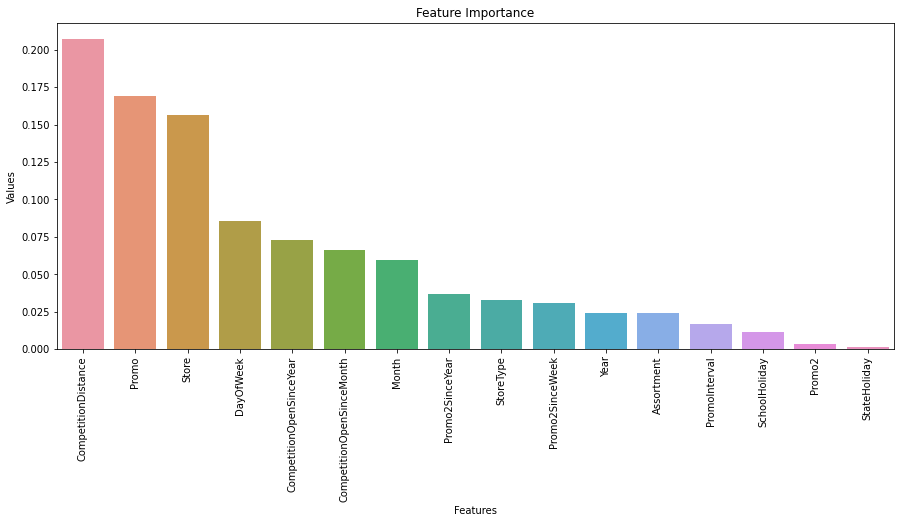

In [261]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

## Conclusion:
* Closer competiton distance make stores more competitive and thus by using Promo codes can help them to boost their sales.

* Store Type affects the sales - Of all a,b,c,d store models 'b' type stores have the highest sales.

* Promo code can help increase in the competition and lead to more sales.

* Sales on 1 (Monday) and 5 (Friday) are the highest.

* Assortment level 'b' have the highest sales.

* Customers are definately attracted by Promo codes thus sales are higher when there is a Promo code in a Store

* Since most of the stores are closed on Holidays, the feature state holidays has no effect on sales